In [1]:
import pandas as pd

In [2]:
tweets = pd.read_csv('dog_rates_tweets.csv', parse_dates = True)


In [3]:
tweets

,id,created_at,text
0,994677639364403200,2018-05-10 20:36:44,@Steff88979267 tell them to h*ck off
1,994364904978239488,2018-05-09 23:54:02,@NFLOwnerGBP take it back
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...
3,994336722875047936,2018-05-09 22:02:03,@rachaellanaghan ❤️
4,994024065982717952,2018-05-09 01:19:40,This is Captain Jack Wobbles. He is currently ...
...,...,...,...
11710,1091789851282665472,2019-02-02 20:05:59,This is Cadogan. He’s had the same morning rou...
11711,1091772144927666176,2019-02-02 18:55:38,@mayapolarbear 6/5 stars
11712,1091425960606367745,2019-02-01 20:00:01,@Acallofthevoid 🤗
11713,1091417463512678400,2019-02-01 19:26:15,@jaytay777 OLIVER!!! you’re doing so well budd...


In [4]:
extracted = tweets.text.str.extract(r'([0-9]{1,2}/10)', expand = False)

In [5]:
ratings = extracted.dropna()

In [6]:
ratings

2        14/10
7        13/10
8        14/10
24       13/10
30       13/10
         ...  
11631    15/10
11638    14/10
11665    13/10
11666    13/10
11672    12/10
Name: text, Length: 1877, dtype: object

In [7]:
ratings = ratings.str.replace('/10', '')

In [8]:
ratings

2        14
7        13
8        14
24       13
30       13
         ..
11631    15
11638    14
11665    13
11666    13
11672    12
Name: text, Length: 1877, dtype: object

In [9]:
ratings = pd.to_numeric(ratings)

In [10]:
ratings = ratings [ratings <= 25]

In [11]:
tweets['ratings'] = ratings

In [12]:
indexing = tweets.loc[ratings.index]

In [13]:
indexing['created_at'] = pd.to_datetime(indexing['created_at'])

In [14]:
indexing['ratings'] 

2        14.0
7        13.0
8        14.0
24       13.0
30       13.0
         ... 
11631    15.0
11638    14.0
11665    13.0
11666    13.0
11672    12.0
Name: ratings, Length: 1872, dtype: float64

In [15]:
def to_timestamp(datetime):
    return datetime.timestamp()
indexing['timestamp'] = indexing['created_at'].apply(to_timestamp)

In [16]:
indexing

,id,created_at,text,ratings,timestamp
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525910e+09
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525797e+09
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525735e+09
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525394e+09
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525285e+09
...,...,...,...,...,...
11631,1096203765189726208,2019-02-15 00:25:18,"honorary 15/10 for Oppy, the very good space r...",15.0,1.550190e+09
11638,1095730341828915200,2019-02-13 17:04:05,This is George. He doesn’t chew socks. He just...,14.0,1.550077e+09
11665,1093636946046242817,2019-02-07 22:25:41,@Panthers @Proud_KCS 13/10 easy,13.0,1.549578e+09
11666,1093636812818472960,2019-02-07 22:25:09,RT @GeekandSundry: .@Dog_Rates Announces a New...,13.0,1.549578e+09


In [17]:
from scipy import stats

In [18]:
linearRegression = stats.linregress(indexing['timestamp'], indexing['ratings'])

In [19]:
linearRegression.slope

2.3012301548088727e-08

In [20]:
linearRegression.intercept

-22.478667531229842

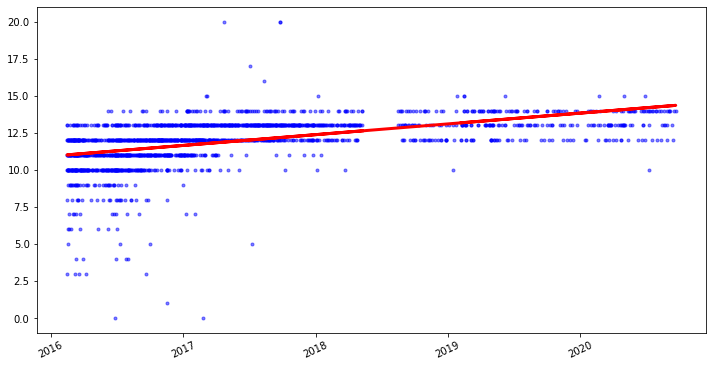

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.xticks(rotation = 25)

plt.plot(indexing['created_at'], indexing['ratings'], 'b.', alpha = 0.5)
plt.plot(indexing['created_at'], indexing['timestamp']*linearRegression.slope + linearRegression.intercept, 'r-', linewidth=3)

In [22]:
linearRegression.pvalue

1.7465858342549217e-115

In [28]:
residual = indexing['ratings'] - (linearRegression.slope*indexing['timestamp'] + linearRegression.intercept)

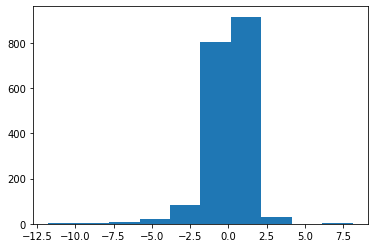

In [29]:
plt.hist(residual)
plt.show()